# Idea

The main idea that the datapoints order in the dataset is important<br>
The network has 3 types of layers:<br>
1) Input layer<br>
2) Hidden layers<br>
3) Output layer<br>

In hidden layers the neuron pass the walue in 2 directions:<br>
1) To the next neuron in the next layer<br>
2) To the next neuron in the same layer<br>

Every next neuron in the same layer has a history of previous neurons in the same layer (memory of the sequence)<br>

The most commonly used activation function is a <b>hyperbolic tangent</b>

# Implementation from scratch

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/clean_weather.csv', index_col=0)
data = data.ffill()

In [3]:
data

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0
2022-11-25,70.0,39.0,0.0,62.0


## Some intuition behind

In [23]:
np.random.seed(0) # when I initialize weight matrices they get the same initialization every time (it makes sure that the random numbers are generated in a fixed order)

i_weight = np.random.rand(1,2) # initialize input weights with random numbers in the shape 1 row and 2 columns
h_weight = np.random.rand(2,2) # initialize hidden weights with random numbers in the shape 2 rows and 2 columns
o_weight = np.random.rand(2,1) # initialize output weights with random numbers in the shape 2 rows and 1 column

temps = data['tmax'].tail(3).to_numpy() # the sequence that can be processed with this RNN

In [24]:
i_weight, h_weight, o_weight

(array([[0.5488135 , 0.71518937]]),
 array([[0.60276338, 0.54488318],
        [0.4236548 , 0.64589411]]),
 array([[0.43758721],
        [0.891773  ]]))

In [25]:
temps

array([66., 70., 62.])

In [27]:
# If split this it will be a LITTLE BIT EASIER for RNN to process values 
# Each of these values is a different input in our sequence
x0 = temps[0].reshape(1,1) # 1x1 matrix
x1 = temps[1].reshape(1,1) # 1x1 matrix
x2 = temps[2].reshape(1,1) # 1x1 matrix

In [28]:
# Calculate xi at timestamp 0 (t0)
xi_0 = x0 @ i_weight # it gives 2 features because it's multiplied by (1,2) matrix

xh_0 = np.maximum(0, xi_0) # ReLU activation function (it sets any values below 0 to 0 to create a non-linearity in the network). It can be the other activation function

xo_0 = xh_0 @ o_weight

In [29]:
xi_0, xh_0, xo_0

(array([[36.22169126, 47.20249818]]),
 array([[36.22169126, 47.20249818]]),
 array([[57.94406231]]))

In [30]:
# Calculate xi at timestamp 1 (t1)
xi_1 = x1 @ i_weight # it gives 2 features because it's multiplied by (1,2) matrix

xh = xh_0 @ h_weight
xh_1 = np.maximum(0, xh + xi_1) # ReLU activation function (it sets any values below 0 to 0 to create a non-linearity in the network). It can be the other activation function

xo_1 = xh_1 @ o_weight

In [32]:
xh

array([[41.83067381, 50.22440612]])

In [31]:
xi_1, xh_1, xo_1

(array([[38.41694527, 50.06325565]]),
 array([[ 80.24761908, 100.28766177]]),
 array([[124.54916092]]))

In [62]:
# Calculate xi at timestamp 2 (t2)
xi_2 = x2 @ i_weight # it gives 2 features because it's multiplied by (1,2) matrix

xh = xh_1 @ h_weight
xh_2 = np.maximum(0, xh + xi_2) # ReLU activation function (it sets any values below 0 to 0 to create a non-linearity in the network). It can be the other activation function

xo_2 = xh_2 @ o_weight

In [64]:
xh

array([[ 98.42515312, 114.17251058]])

In [63]:
xi_2, xh_2, xo_2

(array([[34.02643724, 44.34174072]]),
 array([[132.45159036, 158.51425129]]),
 array([[199.31785159]]))

## Tanh activation function

In [ ]:
# Notice that the prediction are getting higher and higher (xo_0, xo_1, xo_2 ...)
# They get less and less accurate when as we go through the sequence
# The reason is the ReLU activation function, because IT DOESN'T SCALE INPUTS AT ALL
# It just set them to 0 if they are below 0, so hidden states get bigger and bigger (memory of the network is larger and larger)
# This means that the predictions getting larger and larger (they depend on a hidden layers)
# The most commonly used activation function to avoid this is a hyperbolic tangent (tanh)

$$\tanh = \dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

In [ ]:
# If x is negative it will QUICKLY push the value to be constant (the same thing if it's positive)

Text(0, 0.5, 'np.tanh(temps)')

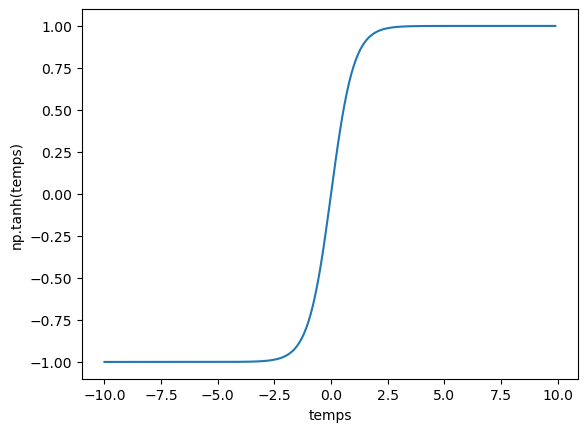

In [65]:
import matplotlib.pyplot as plt

temps = np.arange(-10, 10, .1)

plt.plot(temps, np.tanh(temps))
plt.xlabel('temps')
plt.ylabel('np.tanh(temps)')

In [ ]:
# A really good thing in a hyperbolic tangent function that it has a very good gradient (the big slope)
# This is very effective to do a gradient descent fo this function

In [66]:
from sympy import diff, symbols, exp # if you don't believe that the derivative is correct (it helps to get the derivative)

x = symbols('x')
sympy_tanh = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
diff(sympy_tanh, x) # the derivative of a hyperbolic tangent function

(-exp(x) + exp(-x))*(exp(x) - exp(-x))/(exp(x) + exp(-x))**2 + 1

In [ ]:
# It's the same as this

$1 - \tanh^2{x}$

In [ ]:
# The nice gradiend for gradient descent

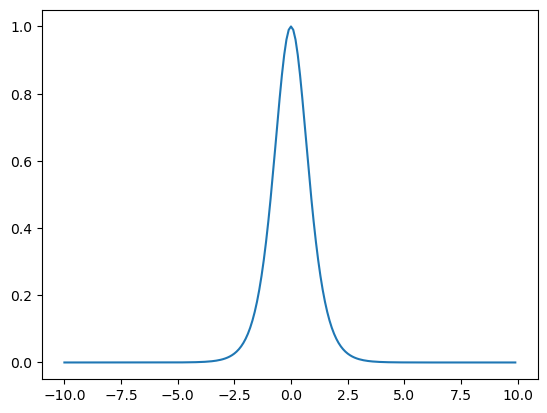

In [67]:
plt.plot(temps, 1 - np.tanh(temps) ** 2) # it's very steep, it's curved, so we won't stuck anywhere (so that is the reason)

## Forward propagation

In [68]:
np.random.seed(0)

# Add scaling to range weights from negative 0.1 to 0.1
# This ensures that the output doesn't get huge over time and the tanh function passes values through
i_weight = np.random.rand(1,5) / 5 - .1
h_weight = np.random.rand(5,5) / 5 - .1
h_bias = np.random.rand(1,5) / 5 - .1 # Adding bias
o_weight = np.random.rand(5,1) * 50
o_bias = np.random.rand(1,1) # Adding bias

In [123]:
outputs = np.zeros(3) # A numpy array to store outputs at each sequence position
hiddens = np.zeros((3,5)) # A numpy array to store hiddens at each sequence position
prev_hidden = None
sequence = data['tmax'].tail(3).to_numpy()

In [137]:
# Forward propagations implementation
for i in range(3):
    x = sequence[i].reshape(1,1)
    
    xi = x @ i_weight
    if prev_hidden is None:
        xh = xi
    else:
        xh = xi + prev_hidden @ h_weight + h_bias # bias term gives a constant shift of each value
    
    xh = np.tanh(xh) # applying activation function
    prev_hidden = xh
    hiddens[i] = xh # store hiddens for use in back propagation
    
    xo = xh @ o_weight + o_bias
    outputs[i] = xo # store outputs for use in back propagation

In [ ]:
outputs

In [138]:
hiddens

array([[ 0.5651302 ,  0.99406563,  0.88186195,  0.67621721, -0.82571584],
       [ 0.59125459,  0.99579217,  0.89914685,  0.69752415, -0.84425509],
       [ 0.53878899,  0.99165027,  0.86293671,  0.66139807, -0.80562681]])

## Backward propagation

In [ ]:
# It's where needed to update the parameters the weights and biases to reduce the training error
# Need to figure out the error...

In [ ]:
# To calculate back propagation for RNN is more complicated then for regular NN
# For example h3 passes data to o3 only (if it's the last neuron)
# And for that we need to calculate gradiend only for h3
# For the other steps the situation is different
# h2 passes data to o2 and to h3, so actually affects o2 and o3
# So it's needed to adjust 2 gradients for h2
# Gradient is the partial derivative of the loss with respect to a parameter

In [ ]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# MSE gradiend function ?????? CHECK PREVIOUS LESSONS
def mse_grad(actual, predicted):
    return (predicted - actual)

In [ ]:
actuals = np.array([70, 62, 65])
loss_grad = mse_grad(actuals, outputs) # it tells us how much do we need to adjust the output of the NN to reduce the error (the loss)

In [ ]:
loss_grad

In [ ]:
next_hidden = None # since we go backward we are going to track the next hidden state (the the previous one)

o_weight_grad, o_bias_grad, h_weight_grad, h_bias_grad, i_weight_grad = [0] * 5

In [ ]:
# Backward propagations implementation

for i in range(2, -1, -1):
    l_grad = loss_grad[i].reshape(1,1) # getting the loss gradient (in forward path we basically say how right or wrong is the prediction)
    
    o_weight_grad += hiddens[i][:, np.newaxis] @ l_grad # ????? Based on how right or wrong is that prediction we adjust the output weights (basicall we say how much do I need to adjust the output weights to make the prediction better)
    o_bias_grad += np.mean(l_grad) # ????? Adjusting the output bias
    
    o_grad = l_grad @ o_weight.T # it tells us that the hidden step output some value and how much is it needed to adjust those values reduce error in the output
    if next_hidden is None:
        h_grad = o_grad
    else:
        h_grad = o_grad + next_hidden @ h_weight.T # it gives the full gradient with respect to the output of the hidden step
        
    tanh_deriv = 1 - hiddens[i,:][np.newaxis,:] # derivative of a hyperbolic tangent (we did hyperbolic tangent before, so now we need to undo it)
    h_grad = np.multiply(h_grad, tanh_deriv)
    
    next_hidden = h_grad
    
    if i > 0:
        h_weight_grad += hiddens[i-1,:][:,np.newaxis] @ h_grad
        h_bias_grad += np.mean(h_grad)
        
    i_weight_grad += sequence[i].reshape(1,1).T @ h_grad # it gives us how much do we need to update each of the parameters in our network to reduce error

In [ ]:
i_weight_grad

In [ ]:
lr = 1e-6 # update parameters using learning rate

i_weight -= i_weight_grad * lr
h_weight -= h_weight_grad * lr
h_bias -= h_bias_grad * lr
o_weight -= o_weight_grad * lr
o_bias -= o_bias_grad * lr

In [ ]:
i_weight

## Complete implementation

In [178]:
from sklearn.preprocessing import StandardScaler
import math

# Define predictors and the target
PREDICTORS = ['tmax', 'tmin', 'rain']
TARGET = 'tmax_tomorrow'

# Scale the data to have mean 0
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# Split into train, valid and test sets
np.random.seed(0)
split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))]) # training set has about 70% of the data in it
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def init_params(layer_conf): # This function takes in the layer configuration (how many using will be in the hidden layer of the NN)
    layers = []
    for i in range(1, len(layer_conf)):
        np.random.seed(0)
        # Need to scale the parameters, so they are not too large
        # This scaling will essentially multiply each of the weights (which are random numbers from 0 to 1) by k
        k = 1 / math.sqrt(layer_conf[i]['hidden']) # layer_conf[i]['hidden'] it's the number of hiddent units in the layer
        i_weight = np.random.rand(layer_conf[i-1]['units'], layer_conf[i]['hidden']) * 2 * k - k # ?????
        
        h_weight = np.random.rand(layer_conf[i]['hidden'], layer_conf[i]['hidden']) * 2 * k - k # ?????
        h_bias = np.random.rand(1, layer_conf[i]['hidden']) * 2 * k - k # ?????
        
        o_weight = np.random.rand(layer_conf[i]['hidden'], layer_conf[i]['output']) * 2 * k - k # ?????
        o_bias = np.random.rand(1, layer_conf[i]['output']) * 2 * k - k # ?????
        
        layers.append(
            [i_weight, h_weight, h_bias, o_weight, o_bias]
        )
    return layers

In [182]:
layer_conf = [
    {'type': 'input', 'units': 3},
    {'type': 'rnn', 'hidden': 4, 'output': 1}
]

In [ ]:
def forward(x, layers):
    hiddens = []
    outputs = []
    for i in range(len(layers)): # loop throug each of the current layers assuming we have a multiple
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i] # each layer has it's own set of weights
        # Create arrays to store the hidden states and outputs
        hidden = np.zeros((x.shape[0], i_weight.shape[1])) # need in back propagation
        output = np.zeros((x.shape[0], o_weight.shape[1])) # need to calculate loss
        for j in range(x.shape[0]):
            input_x = x[j,:][np.newaxis,:] @ i_weight # claculate input 
            hidden_x = input_x + hidden[max(j-1,0),:][np.newaxis,:] @ h_weight + h_bias # calculate hidden state
            # Activation. tanh avoids outputs getting larger and larger
            hidden_x = np.tanh(hidden_x)
            # Store hidden for use in backprop
            hidden[j,:] = hidden_x
            
            # Output layer
            output_x = hidden_x @ o_weight + o_bias
            output[j,:] = output_x
        hiddens.append(hidden)
        outputs.append(output)
    return hiddens, outputs[-1] # in case if it's multiple layers we only return an output of the last layer for the loss function

In [ ]:
def backward(layers, x, lr, grad, hiddens):
    for i in range(len(layers)):
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i] # pull weights out of the latyer again
        hidden = hiddens[i] # initialize the hidden to be the hidden from the forward path
        next_h_grad = None
        i_weight_grad, h_weight_grad, h_bias_grad, o_weight_grad, o_bias_grad = [0] * 5 # initialize gradients to 0, so we can accumulate gradients across the sequence positions
        
        for j in range(x.shape[0] - 1, -1, -1): # loop across every sequence position
            # Add new axis in the first dimension
            out_grad = grad[j,:][np.newaxis, :] # get the output of the gradient relative to the output of RNN
            
            # Output updates
            # np.newaxis create a size 1 axis, in this case transposing matrix
            o_weight_grad += hidden[j,:][:,np.newaxis] @ out_grad
            o_bias_grad += out_grad
            
            # Propagate gradient to hidden unit
            h_grad = out_grad @ o_weight.T # push the gradient down to the hidden unit
            
            if j < x.shape[0] - 1:
                # Then we multiply the gradient by the hidden weights to pull gradient from next hidden state to current hiddent state
                hh_grad = next_h_grad @ h_weight.T
                # Add the gradient together to combine output contribution and hiddent contribution
                h_grad += hh_grad
                
            # Pull the gradient across the current hidden non-linearity
            # derivative of tanh is 1 - tanh(x) ** 2
            # so we take the output of tanh (next hidden state), and plug in
            tanh_deriv = 1 - hidden[j][np.newaxis,:] ** 2
            
            # next_h_grad @ np.diag(tanh_deriv_next) multiplies each element of nex_h_grad by the deriv
            # Effect is to pull value across non-linearity
            h_grad = np.multiply(h_grad, tanh_deriv)
            
            # Store to compute h_grad for previous sequence position
            next_h_grad = h_grad.copy()
            
            # If we're not at the very beginning
            if j > 0:
                # Multiply input from previous layer by post-non-linearity grad at current layer
                h_weight_grad += hidden[j-1][:,np.newaxis] @ h_grad
                h_bias_grad += h_grad
                
            i_weight_grad += x[j,:][:,np.newaxis] @ h_grad # update the input weights
            
        # Normalize lr by number of sequence elements
        # Use accumulated gradients to update all parameters
        lr = lr / x.shape[0] # to average the gradient output across of all positions
        i_weight -= i_weight_grad * lr
        h_weight -= h_weight_grad * lr
        h_bias -= h_bias_grad * lr
        o_weight -= o_weight_grad * lr
        o_bias -= o_bias_grad * lr
        layers[i] = [i_weight, h_weight, h_bias, o_weight, o_bias]
    return layers

In [ ]:
epochs = 250
lr = 1e-5

layers = init_params(layer_conf)

for epoch in range(epochs):
    sequence_len = 7 # it's how long of a sequence we want to feed into the RNN
    epoch_loss = 0 # to track the loss from epoch to epoch and see if it's decreases or not
    
    for j in range(train_x.shape[0] - sequence_len): # loop acros the training data
        seq_x = train_x[j:(j + sequence_len),] # at each position of a training data we create a new sequence (so we starting from every single temperature value and we are getting the next 7 days of weather)
        seq_y = train_y[j:(j + sequence_len),] # feed it to the network
    
        hiddens, outputs = forward(seq_x, layers) # do forward path
        grad = mse_grad(seq_y, outputs) # calculate gradient
        params = backward(layers, seq_x, lr, grad, hiddens) # update parameters
        epoch_loss += mse(seq_y, outputs) # updatye epoch loss
    
    if epoch % 50 == 0: # every 50 epochs provide some info about the validation set
        valid_loss = 0 # initialize validation loss
        for j in range(valid_x.shape[0] - sequence_len): # loop across the validation set
            seq_x = valid_x[j:(j + sequence_len),] # at each position of a validation data we create a new sequence (so we starting from every single temperature value and we are getting the next 7 days of weather)
            seq_y = valid_y[j:(j + sequence_len),] # feed it to the network
            
            _, outputs = forward(seq_x, layers) # do forward path (we don't need hiddens this time because we don't do any backward propagation on the validation set)
            valid_loss += mse(seq_y, outputs) # updatye validation loss
        print(f'Epoch: {epoch} train loss: {epoch_loss / len(train_x)} valid loss: {valid_loss / len(valid_x)}')

# TensorFlow (symbols prediction)

## Imports

In [ ]:
import os
os.environ['TF_CPP__MIN_LOG_LEVEL'] = '2'

import numpy as np
import re

from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

The idea is the next: need input some symbols to the network and the network should predict the next symbol

In [ ]:
with open('data/affirmations.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = text.replace('\ufeff', '')
    text = re.sub(r'[^A-z ]', '', text) # replace all symbols except letters by empty string

In [ ]:
text

In [ ]:
#

In [ ]:
num_characters = 27 # 26 letters + 1 space
tokenizer = Tokenizer(num_words=num_characters, char_level=True) # max number of symbols that will be returned is 27, char_level=True means split text on symbols
tokenizer.fit_on_texts([text]) # feed text to Tokenizer

In [ ]:
tokenizer.word_index # every symbol has it's own number

In [ ]:
# Architecture of the network will be Many to One (for example we send as input 3 symbols and we need to get the next sybol as an output)
# What can we do
# 1. We can mark every symbol from 0 to 27 and send as an input, but it will work bad because it's difficult to interpret numbers as separate letters
# 2. We can link every input with unique symbol 
# (for example for symbol 'a' we will sent vector [1, 0, 0, ..., 0], for symbol 'b' we will sent vector [0, 1, 0, ..., 0]) etc...
# Actually it's just one hot encoding
# The output vector will be the same

In [ ]:
inp_chars = 6
data = tokenizer.texts_to_matrix(text) # transform text to one hot encoding matrix
n = data.shape[0] - inp_chars # we predict the 4th symbol based on the first 3

In [ ]:
X = np.array([data[i:i + inp_chars, :] for i in range(n)])
Y = data[inp_chars:]

In [ ]:
data.shape

In [ ]:
model = Sequential()
model.add(Input((inp_chars, num_characters)))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(num_characters, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X, Y, batch_size=32, epochs=100)

In [ ]:
def build_phrase(inp_str, str_len=50):
    for i in range(str_len):
        x = []
        for j in range(i, i+inp_chars):
            x.append(tokenizer.texts_to_matrix(inp_str[j]))

        x = np.array(x)
        inp = x.reshape(1, inp_chars, num_characters)

        pred = model.predict(inp)
        d = tokenizer.index_word[pred.argmax(axis=1)[0]]

        inp_str += d

    return inp_str

In [ ]:
res = build_phrase('attitu')

In [ ]:
res

# TensorFlow (words prediction)

In [ ]:
import os
os.environ['TF_CPP__MIN_LOG_LEVEL'] = '2'

import numpy as np

from tensorflow.keras.layers import Input, Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
with open('data/affirmations.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = text.replace('\ufeff', '')

In [ ]:
max_words_count = 1000 # max num of words in the dictionary
tokenizer = Tokenizer(num_words=max_words_count, # we leave 999 the most frequent words (we wil not train the model on rare words)
                      filters='!-"-#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r<<>>', 
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts([text])

In [ ]:
dist = list(tokenizer.word_counts.items())

In [ ]:
dist[:10]

In [ ]:
data = tokenizer.texts_to_sequences([text])
# res = to_categorical(data[0], num_classes=max_words_count)
res = np.array(data[0]) # for embedding

In [ ]:
res.shape

In [ ]:
inp_words = 3
n = res.shape[0] - inp_words

In [ ]:
# X = np.array([res[i:i + inp_words, :] for i in range(n)])
# Y = res[inp_words:]
X = np.array([res[i:i + inp_words] for i in range(n)]) # for embedding
Y = to_categorical(res[inp_words:], num_classes=max_words_count) # for embedding

In [ ]:
model = Sequential()
# model.add(Input((inp_words, max_words_count)))
model.add(Embedding(max_words_count, 256, input_length=inp_words)) # for embedding
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
model.add(SimpleRNN(64, activation='tanh'))
model.add(Dense(max_words_count, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X, Y, batch_size=32, epochs=50)

In [ ]:
def build_phrase(text, str_len=20):
    res = text
    data = tokenizer.texts_to_sequences([text])[0]
    for i in range(str_len):
        # x = to_categorical(data[i: i+inp_words], num_classes=max_words_count)
        # inp = x.reshape(1, inp_words, max_words_count)
        x = data[i: i+inp_words] # for embedding
        inp = np.expand_dims(x, axis=0) # for embedding

        pred = model.predict(inp)
        indx = pred.argmax(axis=1)[0]
        data.append(indx)

        res += ' ' + tokenizer.index_word[indx] 

    return res

In [ ]:
res = build_phrase('think positive and')

In [ ]:
res